<a href="https://colab.research.google.com/github/Ciro125/Alura/blob/main/ML_Pt1_e_2_Otimiza%C3%A7%C3%A3o_de_modelos_atraves_de_hiperpar%C3%A2metros_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1

In [40]:
!pip install graphviz==0.9
!pip install pydot

!apt-get install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [41]:
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [42]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [43]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [44]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [45]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [46]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [47]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [48]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


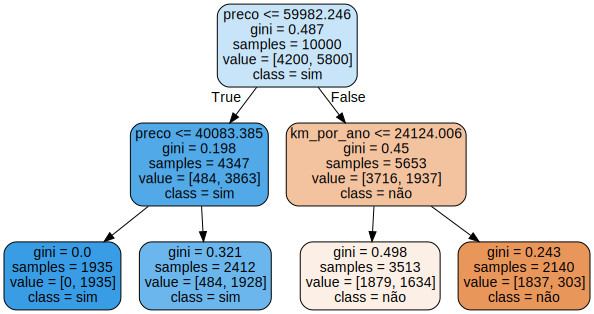

In [49]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                           class_names=["não","sim"], feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [50]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


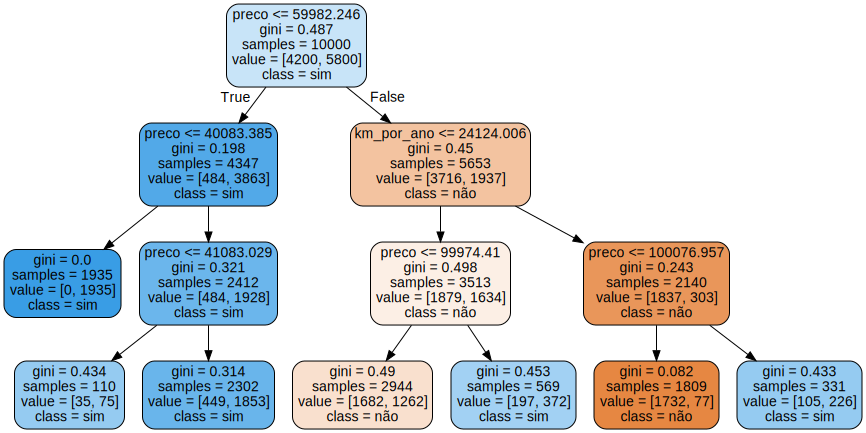

In [51]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                           class_names=["não","sim"], feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [52]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


## Explorando hiper parâmetros em uma dimensão

In [53]:
def roda_arvore_de_decisao(max_depth):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results["train_score"].mean() * 100 
  test_score = results["test_score"].mean() * 100 
  print("Arvore  max_depth = %d, treino = %.2f,  teste = %.2f" % (max_depth, train_score, test_score))
  #imprime_resultados(results)
  tabela = [max_depth,train_score,test_score]
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range (1,33)]
resultados = pd.DataFrame(resultados, columns = ["max_depth","train_score","test_score"])
resultados.head()

Arvore  max_depth = 1, treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, treino = 75.79,  teste = 75.78
Arvore  max_depth = 3, treino = 78.75,  teste = 78.67
Arvore  max_depth = 4, treino = 78.79,  teste = 78.63
Arvore  max_depth = 5, treino = 78.94,  teste = 78.56
Arvore  max_depth = 6, treino = 79.17,  teste = 78.12
Arvore  max_depth = 7, treino = 79.50,  teste = 77.96
Arvore  max_depth = 8, treino = 79.89,  teste = 77.86
Arvore  max_depth = 9, treino = 80.46,  teste = 77.38
Arvore  max_depth = 10, treino = 81.16,  teste = 77.19
Arvore  max_depth = 11, treino = 82.03,  teste = 76.97
Arvore  max_depth = 12, treino = 82.89,  teste = 76.49
Arvore  max_depth = 13, treino = 83.95,  teste = 75.81
Arvore  max_depth = 14, treino = 85.03,  teste = 75.66
Arvore  max_depth = 15, treino = 86.14,  teste = 75.16
Arvore  max_depth = 16, treino = 87.19,  teste = 75.11
Arvore  max_depth = 17, treino = 88.31,  teste = 74.74
Arvore  max_depth = 18, treino = 89.26,  teste = 74.33
Arvore  max_depth =

,max_depth,train_score,test_score
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


<Axes: xlabel='max_depth', ylabel='test_score'>

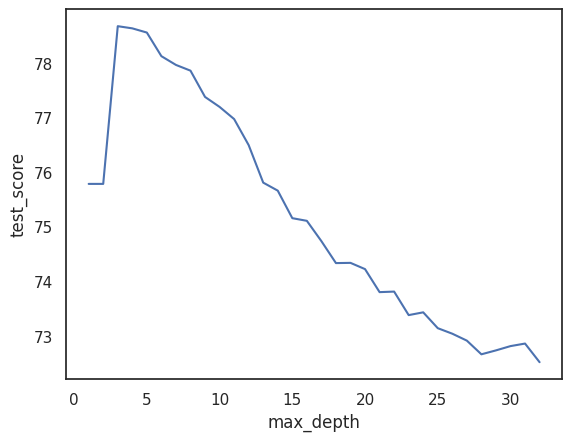

In [54]:
import seaborn as sns

sns.lineplot(x = "max_depth", y = "test_score", data = resultados)

## Overfit - Ficou perfeito para o treino e ruim para o teste. 

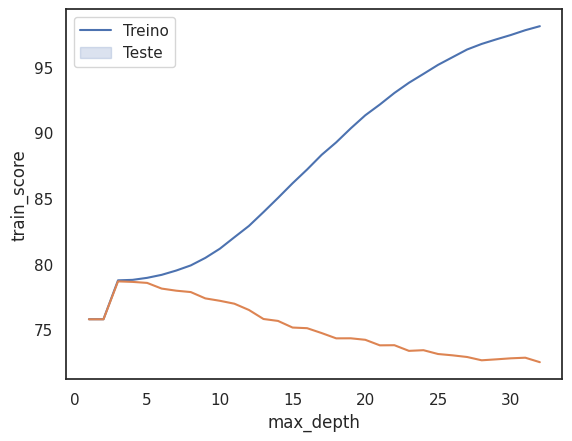

In [55]:
import matplotlib.pyplot as plt


sns.lineplot(x = "max_depth", y = "train_score", data = resultados)
sns.lineplot(x = "max_depth", y = "test_score", data = resultados)
plt.legend(["Treino","Teste"])

In [56]:
resultados.sort_values("test_score", ascending=False).head()

,max_depth,train_score,test_score
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


## Explorando hiper parâmetros em uma dimensão

In [57]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results["train_score"].mean() * 100 
  test_score = results["test_score"].mean() * 100 
  print("Arvore  max_depth = %d, min_samples_leaf = %d treino = %.2f,  teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  #imprime_resultados(results)
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range (1,33):
    for min_samples_leaf in [32,64,128,256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", "min_samples_leaf", "train_score","test_score"])
  return resultados

resultados = busca()
resultados.head()

Arvore  max_depth = 1, min_samples_leaf = 32 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 64 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 128 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 256 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 32 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 64 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 128 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 256 treino = 75.79,  teste = 75.78
Arvore  max_depth = 3, min_samples_leaf = 32 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 64 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 128 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 256 treino = 78.75,  teste = 78.67
Arvore  max_depth = 4, min_samples_leaf = 32 treino = 78.75,  teste = 78.67
Arvore

,max_depth,min_samples_leaf,train_score,test_score
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [58]:
resultados.sort_values("test_score", ascending=False).head()

,max_depth,min_samples_leaf,train_score,test_score
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [59]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train_score,test_score
max_depth,1.000000e+00,-2.780775e-16,0.536705,-0.027675
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.409676,0.349011
train_score,5.367048e-01,-4.096762e-01,1.000000,0.116466
test_score,-2.767507e-02,3.490111e-01,0.116466,1.000000


<Axes: >

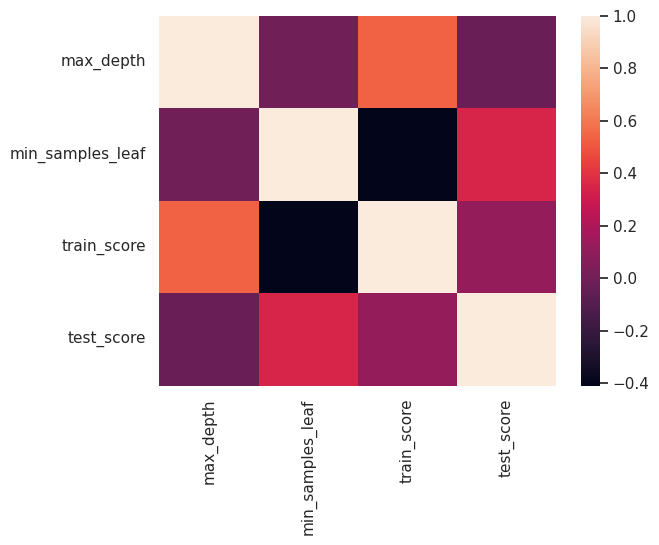

In [60]:
sns.heatmap(corr)

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='train_score', ylabel='max_depth'>,
        <Axes: xlabel='test_score', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='train_score', ylabel='min_samples_leaf'>,
        <Axes: xlabel='test_score', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='train_score'>,
        <Axes: xlabel='min_samples_leaf', ylabel='train_score'>,
        <Axes: xlabel='train_score', ylabel='train_score'>,
        <Axes: xlabel='test_score', ylabel='train_score'>],
       [<Axes: xlabel='max_depth', ylabel='test_score'>,
        <Axes: xlabel='min_samples_leaf', ylabel='test_score'>,
        <Axes: xlabel='train_score', ylabel='test_score'>,
        <Axes: xlabel='test_score', ylabel='test_score'>]], dtype=object)

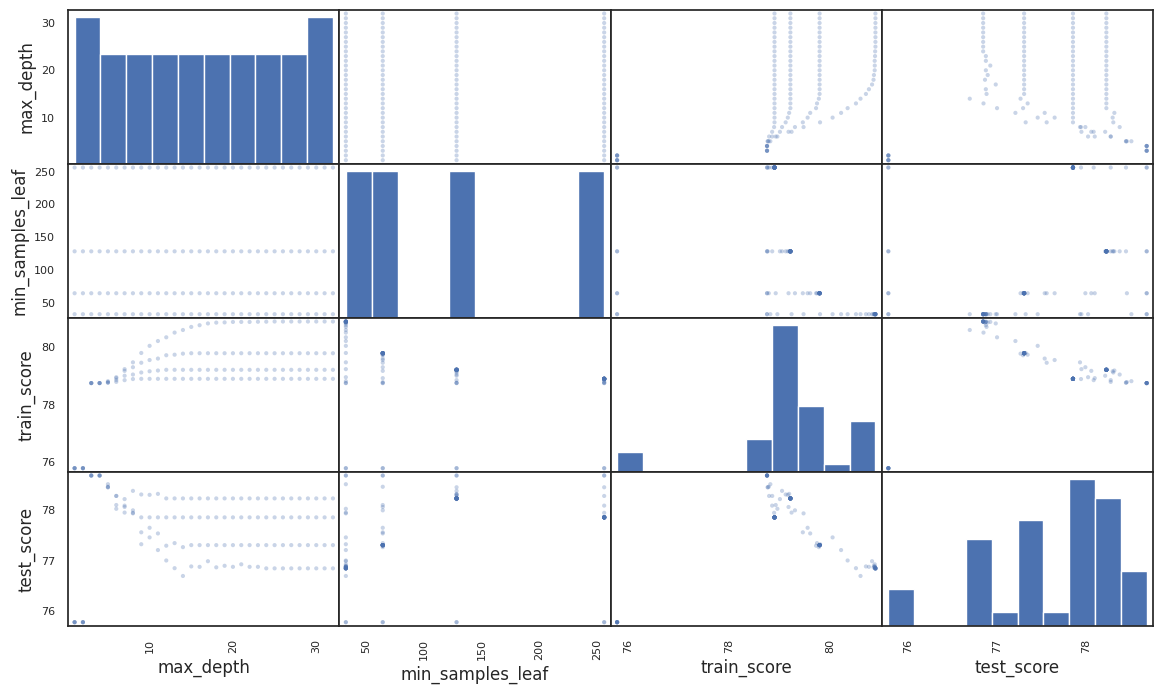

In [61]:
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(resultados, figsize = (14,8), alpha =0.3)

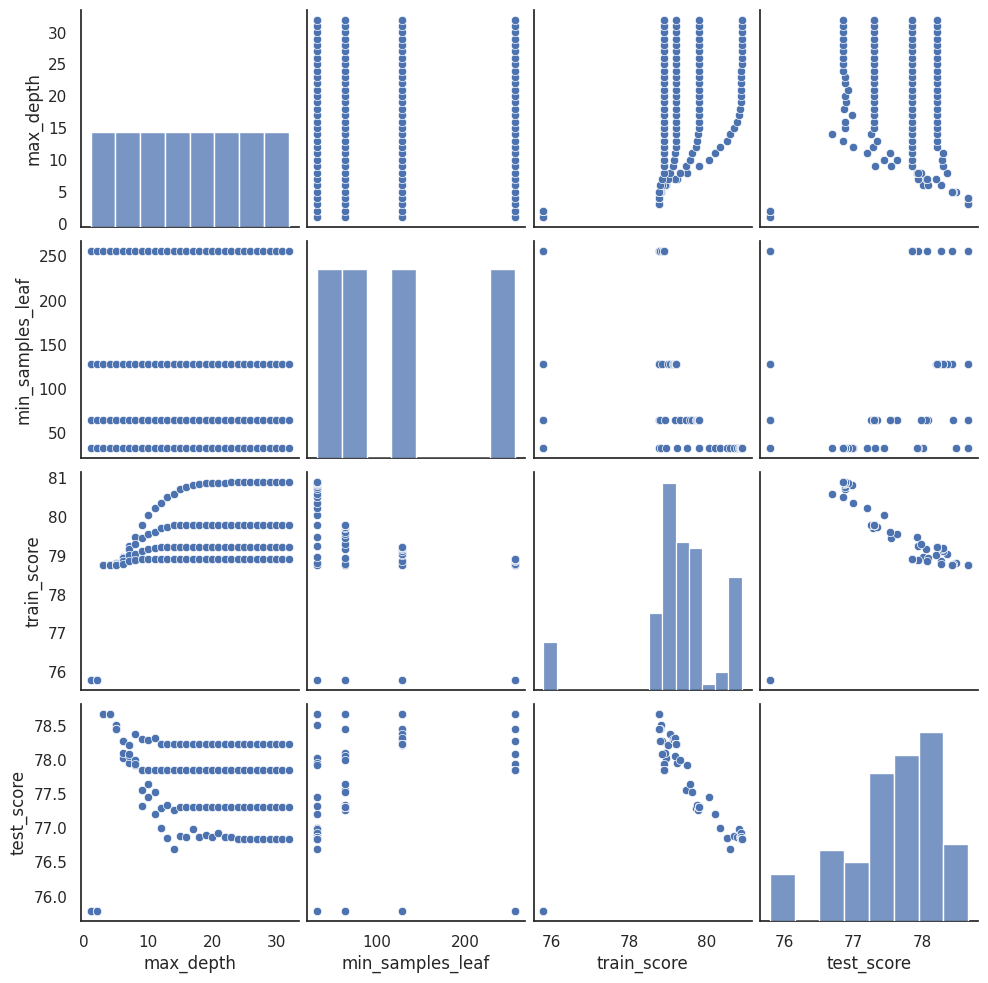

In [62]:
sns.pairplot(resultados)

<Axes: >

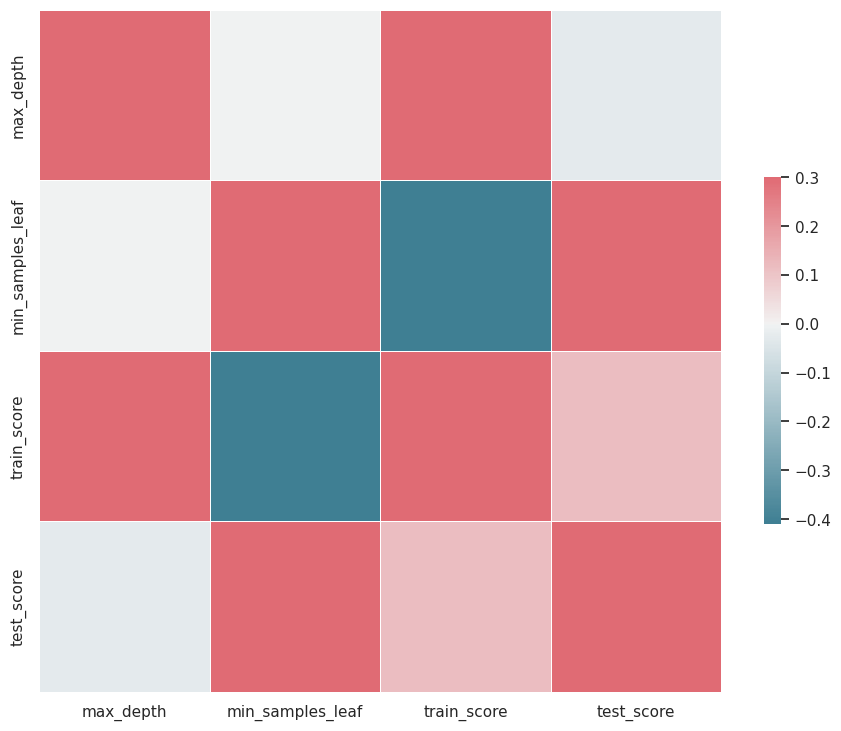

In [63]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [64]:
def busca():
  resultados = []
  for max_depth in range (1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", "min_samples_leaf", "train_score","test_score"])
  return resultados

resultados = busca()
resultados.head()

Arvore  max_depth = 1, min_samples_leaf = 128 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 192 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 256 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 512 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 128 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 192 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 256 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 512 treino = 75.79,  teste = 75.78
Arvore  max_depth = 3, min_samples_leaf = 128 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 192 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 256 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 512 treino = 77.53,  teste = 77.50
Arvore  max_depth = 4, min_samples_leaf = 128 treino = 78.75,  teste = 78.67

,max_depth,min_samples_leaf,train_score,test_score
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


In [65]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train_score,test_score
max_depth,1.000000e+00,6.863211e-17,0.354588,0.240852
min_samples_leaf,6.863211e-17,1.000000e+00,-0.637649,-0.440661
train_score,3.545878e-01,-6.376494e-01,1.000000,0.909222
test_score,2.408525e-01,-4.406611e-01,0.909222,1.000000


<Axes: >

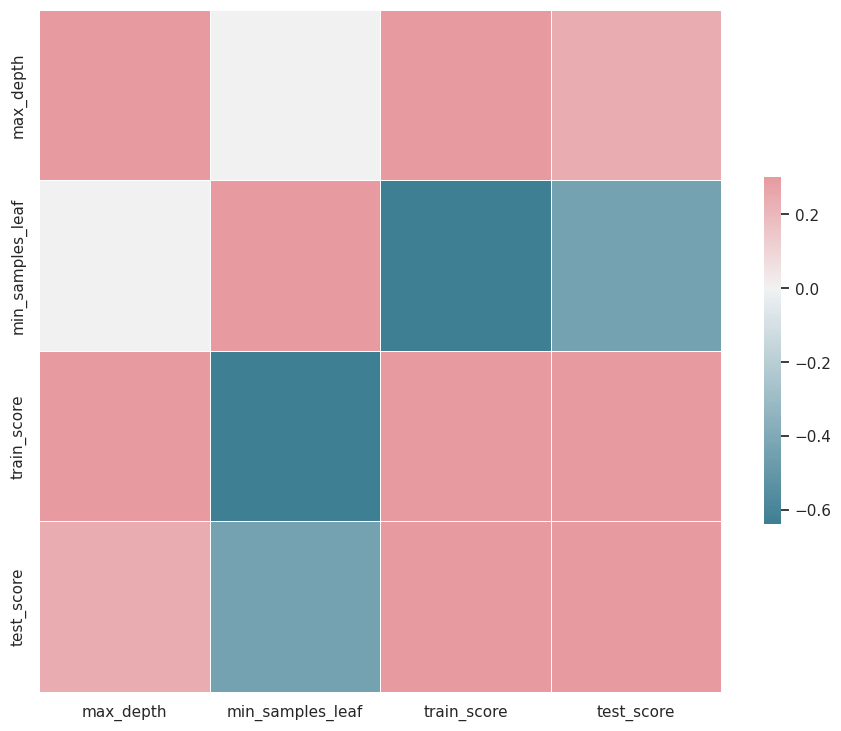

In [66]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [67]:
resultados.sort_values("test_score", ascending=False).head()

,max_depth,min_samples_leaf,train_score,test_score
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


## Explorando 3 dimensões de hiperparametros


In [68]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results["fit_time"].mean()
  score_time = results["score_time"].mean()
  train_score = results["train_score"].mean() * 100 
  test_score = results["test_score"].mean() * 100 
  #print("Arvore  max_depth = %d, min_samples_leaf = %d, min_samples_split =%d treino = %.2f,  teste = %.2f" % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  #imprime_resultados(results)
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range (1,33):
    for min_samples_leaf in [32,64,128,256]:
      for min_samples_split in [32,64,128,256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", "min_samples_leaf", "min_samples_split", "train_score","test_score", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train_score,test_score,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.007089,0.002575
1,1,32,64,75.791169,75.784219,0.006597,0.002447
2,1,32,128,75.791169,75.784219,0.006165,0.002150
3,1,32,256,75.791169,75.784219,0.006569,0.002384
4,1,64,32,75.791169,75.784219,0.006324,0.002247


In [69]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,min_samples_split,train_score,test_score,fit_time,score_time
max_depth,1.000000e+00,1.300685e-16,4.182375e-16,0.529391,0.011529,0.478516,0.134607
min_samples_leaf,1.300685e-16,1.000000e+00,0.000000e+00,-0.341222,0.286555,-0.400996,-0.015193
min_samples_split,4.182375e-16,0.000000e+00,1.000000e+00,-0.126171,0.132827,-0.037680,0.018886
train_score,5.293913e-01,-3.412220e-01,-1.261715e-01,1.000000,0.247850,0.721535,0.172022
test_score,1.152853e-02,2.865546e-01,1.328271e-01,0.247850,1.000000,-0.000333,0.095790
fit_time,4.785160e-01,-4.009961e-01,-3.767993e-02,0.721535,-0.000333,1.000000,0.689182
score_time,1.346066e-01,-1.519339e-02,1.888645e-02,0.172022,0.095790,0.689182,1.000000


<Axes: >

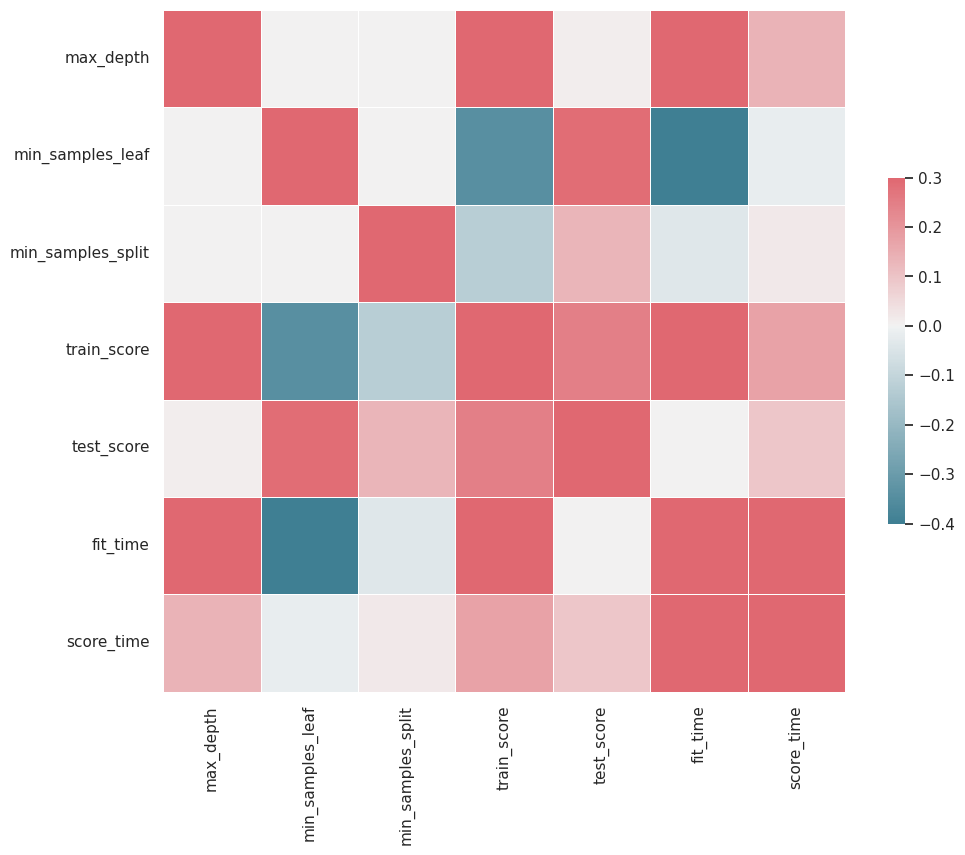

In [70]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [71]:
resultados.sort_values("test_score", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train_score,test_score,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.012531,0.002266
48,4,32,32,78.750993,78.672633,0.013112,0.002299
34,3,32,128,78.750993,78.672633,0.011105,0.002243
35,3,32,256,78.750993,78.672633,0.011031,0.002188
36,3,64,32,78.750993,78.672633,0.011029,0.002307


## Explorando espaço de hiper parâmetros com GridSearchCV


In [72]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "max_depth" :[3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaço_de_parametros,
                     cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012918,0.002793,0.002570,0.000535,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.011249,0.000197,0.002337,0.000097,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.011315,0.000349,0.002371,0.000120,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.011563,0.000391,0.002408,0.000064,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.011319,0.000283,0.002409,0.000126,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [73]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [74]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [75]:
from sklearn.metrics import accuracy_score

# Evitar essa abordagem pois estara sendo otimista

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


## Como obter uma estimativa sem esses vicio nos dados que eu ja vi?

No caso de cross validation, com busca de hiper parâmetros, fazemos uma nova validação cruzada. 
Chama-se Nested Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits = 10), groups = dados.modelo)

ValueError: ignored

## Infelizmente como o Pandas não suporta nested validation com group k fold, não conseguimos prever o resultado para novos grupos

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "max_depth" :[3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaço_de_parametros,
                     cv = KFold(n_splits = 5, shuffle = True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018682,0.005062,0.003530,0.000195,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.014027,0.000213,0.003204,0.000094,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.014158,0.000219,0.003241,0.000044,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.014844,0.000705,0.003451,0.000221,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.014619,0.000260,0.003502,0.000140,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [79]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [80]:
imprime_score(scores)

Accuracy médio 78.67
Intervalo [76.80, 80.54]


In [81]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

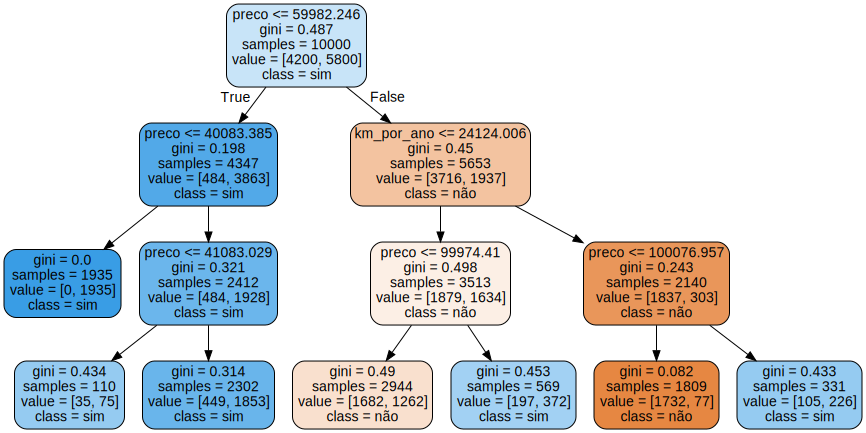

In [82]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True, 
                           class_names=["não","sim"], feature_names = features)
graph = graphviz.Source(dot_data)
graph

# Aula 2

## Aqui vamos comerças uma busca aleatoria
Random Search

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "max_depth" :[3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                     espaço_de_parametros,
                     n_iter = 16,
                     cv = KFold(n_splits = 5, shuffle = True),
                     random_state = SEED)

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019348,0.000556,0.003752,0.000239,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.784,0.769,0.7985,0.793,0.7730,0.7835,0.011278,13
1,0.015718,0.001607,0.003592,0.000045,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
2,0.014687,0.000345,0.003568,0.000102,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
3,0.024866,0.000509,0.003937,0.000297,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,7
4,0.025016,0.000406,0.004020,0.000478,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,7


In [85]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
imprime_score(scores)

Accuracy médio 78.70
Intervalo [76.85, 80.55]


In [87]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)


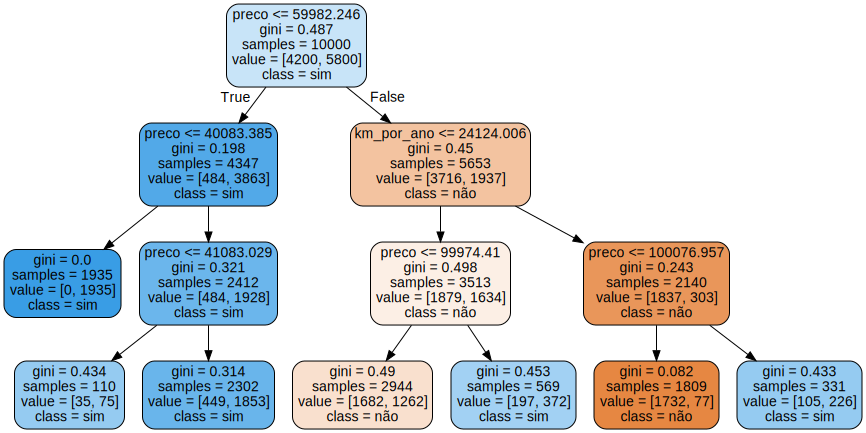

In [88]:
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True, 
                           class_names=["não","sim"], feature_names = features)
graph = graphviz.Source(dot_data)
graph

## Customizando o espaço de hiper parâmetros

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from scipy.stats import randint

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "max_depth" :[3,5,10,15,20,30,None],
    "min_samples_split" : randint(32,128),
    "min_samples_leaf" : randint(32,128),
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                     espaço_de_parametros,
                     n_iter = 16,
                     cv = KFold(n_splits = 5, shuffle = True),
                     random_state = SEED)

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012704,0.000865,0.002482,0.000068,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7840,0.7760,0.8025,0.7930,0.7795,0.7870,0.009618,1
1,0.018294,0.000270,0.002737,0.000244,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7740,0.7725,0.7830,0.7805,0.7725,0.7765,0.004393,14
2,0.017391,0.001200,0.002661,0.000093,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7705,0.7745,0.7990,0.7790,0.7735,0.7793,0.010221,8
3,0.022203,0.001181,0.002695,0.000098,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7575,0.7730,0.7725,0.7835,0.7560,0.7685,0.010378,16
4,0.017151,0.000443,0.002783,0.000427,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7705,0.7735,0.7995,0.7790,0.7745,0.7794,0.010413,7


In [90]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
imprime_score(scores)

Accuracy médio 78.71
Intervalo [77.49, 79.93]


In [91]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


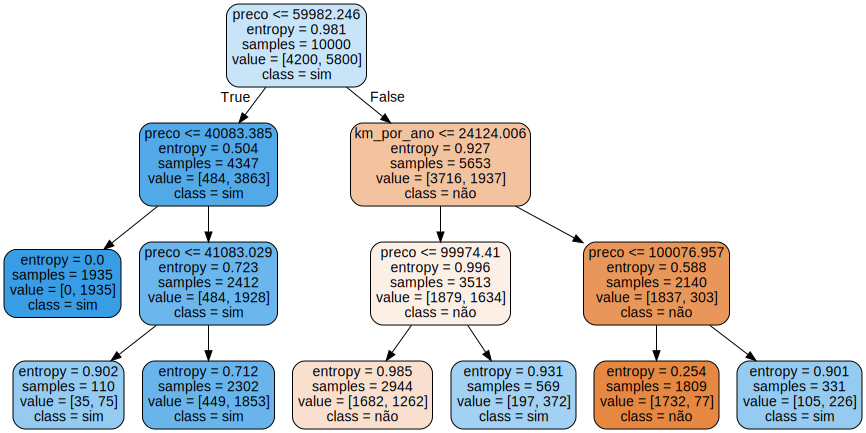

In [92]:
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True, 
                           class_names=["não","sim"], feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [104]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)

for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.784 +-(0.024) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.781 +-(0.017) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.780 +-(0.019) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.780 +-(0.012) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 103, 'min_samples_split': 96}
0.779 +-(0.021) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.779 +-(0.020) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.779 +-(0.009) {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 52}
0.779 +-(0.014) {'criterion': 'entropy', 'max_depth

## Uma exploração mais a fundo dos hiper parâmetros de forma aleatoria

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from scipy.stats import randint

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "max_depth" :[3,5,10,15,20,30,None],
    "min_samples_split" : randint(32,128),
    "min_samples_leaf" : randint(32,128),
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                     espaço_de_parametros,
                     n_iter = 64,
                     cv = KFold(n_splits = 5, shuffle = True),
                     random_state = SEED)

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044685,0.014898,0.011114,0.004930,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7840,0.7760,0.8025,0.7930,0.7795,0.7870,0.009618,1
1,0.071418,0.014364,0.009236,0.004218,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7740,0.7725,0.7830,0.7805,0.7725,0.7765,0.004393,46
2,0.063819,0.010785,0.011197,0.006313,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7705,0.7745,0.7990,0.7790,0.7735,0.7793,0.010221,27
3,0.034455,0.006020,0.004310,0.000168,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7575,0.7730,0.7725,0.7835,0.7560,0.7685,0.010378,64
4,0.023566,0.001271,0.004157,0.000159,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7705,0.7735,0.7995,0.7790,0.7745,0.7794,0.010413,26


In [110]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)

for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 106, 'min_samples_split': 108}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, '

In [112]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 78.68
Intervalo [76.72, 80.64]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


## Comprando GridDearchCV com RandomizedSearch

In [113]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "n_estimators" : [10,100],
    "max_depth" :[3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap" : [True,False],
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
busca = GridSearchCV(RandomForestClassifier(),
                     espaço_de_parametros,
                     cv = KFold(n_splits = 5, shuffle = True))
tac = time.time()
tempo_que_passou = tac - tic
busca.fit(x_azar, y_azar)


print("Tempo %.2f segundos" % tempo_que_passou)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 0.00 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044684,0.003046,0.005225,0.000333,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7560,0.7490,0.7850,0.7450,0.7619,0.015357,130
1,0.405347,0.006362,0.025852,0.003741,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7655,0.7555,0.7945,0.7850,0.7625,0.7726,0.014685,93
2,0.041599,0.001520,0.005753,0.001979,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7780,0.7635,0.7835,0.7845,0.7560,0.7731,0.011373,89
3,0.399106,0.014777,0.025885,0.002633,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7425,0.7550,0.7950,0.7850,0.7620,0.7679,0.019356,119
4,0.041221,0.001437,0.005421,0.001041,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7405,0.7485,0.7760,0.7630,0.7607,0.014250,135


In [114]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)

for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.780 +-(0.020) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.020) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.778 +-(0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.027) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.033) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 100}


In [116]:
#DEMORA PRA CARALHO ESSE CODIGO

tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
tac = time.time()
tempo_que_passou = tac - tic
imprime_score(scores)
melhor = busca.best_estimator_
print("Tempo %.2f segundos" % tempo_que_passou)
print(melhor)

KeyboardInterrupt: ignored

In [119]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "n_estimators" : [10,100],
    "max_depth" :[3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap" : [True,False],
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                     espaço_de_parametros,
                     n_iter = 20,
                     cv = KFold(n_splits = 5, shuffle = True))
tac = time.time()
tempo_que_passou = tac - tic
busca.fit(x_azar, y_azar)


print("Tempo %.2f segundos" % tempo_que_passou)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 0.00 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.634989,0.261914,0.031360,0.007033,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7740,0.7925,0.7775,0.7560,0.7742,0.011724,10
1,0.058694,0.001817,0.006052,0.001155,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.750,0.7785,0.7820,0.7785,0.7645,0.7707,0.011969,13
2,0.581169,0.009931,0.028458,0.001204,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7745,0.7930,0.7785,0.7585,0.7751,0.011178,6
3,0.044707,0.002286,0.004937,0.000137,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.750,0.7600,0.7450,0.7390,0.7520,0.7492,0.007026,20
4,0.054499,0.002149,0.005014,0.000170,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.771,0.7740,0.7635,0.7370,0.7585,0.7608,0.013094,18


In [120]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)

for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.776 +-(0.025) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.023) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.024) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +-(0.032) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.775 +-(0.035) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}


In [121]:
#DEMORA PRA CARALHO ESSE CODIGO

tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
tac = time.time()
tempo_que_passou = tac - tic
imprime_score(scores)
melhor = busca.best_estimator_
print("Tempo %.2f segundos" % tempo_que_passou)
print(melhor)

Accuracy médio 77.59
Intervalo [76.47, 78.71]
Tempo 149.17 segundos
RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=32,
                       min_samples_split=32)


In [122]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "n_estimators" : randint(10,101),
    "max_depth" : randint(3,6),
    "min_samples_split" : randint(32,129),
    "min_samples_leaf" : randint(32,129),
    "bootstrap" : [True,False],
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                     espaço_de_parametros,
                     n_iter = 80,
                     cv = KFold(n_splits = 5, shuffle = True))
busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic


print("Tempo %.2f segundos" % tempo_que_passou)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 0.00 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.768193,0.214517,0.030512,0.006832,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7715,0.7620,0.7750,0.7855,0.7580,0.7704,0.009744,75
1,0.450767,0.066296,0.028950,0.001519,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7715,0.7575,0.7925,0.7855,0.7575,0.7729,0.014277,63
2,0.348565,0.060425,0.022008,0.005002,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7685,0.7695,0.7925,0.7795,0.7575,0.7735,0.011781,59
3,0.197937,0.006694,0.013443,0.000329,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7670,0.7830,0.7865,0.7580,0.7733,0.010429,60
4,0.301325,0.007857,0.020075,0.002822,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7685,0.7930,0.7850,0.7585,0.7754,0.012220,30


In [123]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)

for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.779 +-(0.025) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 84, 'min_samples_split': 89, 'n_estimators': 48}
0.778 +-(0.031) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 96, 'n_estimators': 18}
0.778 +-(0.032) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 121, 'min_samples_split': 47, 'n_estimators': 27}
0.778 +-(0.024) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 96, 'min_samples_split': 98, 'n_estimators': 11}
0.777 +-(0.029) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 63, 'min_samples_split': 88, 'n_estimators': 69}


In [124]:
#DEMORA PRA CARALHO ESSE CODIGO

tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
tac = time.time()
tempo_que_passou = tac - tic
imprime_score(scores)
melhor = busca.best_estimator_
print("Tempo %.2f segundos" % tempo_que_passou)
print(melhor)

KeyboardInterrupt: ignored

## Trabalhar se eu não posso, ou não consigo usar cross validation

In [130]:
from sklearn.model_selection import train_test_split
# 0.6 treino
# 0.2 teste
# 0.2 validação
SEED = 301
np.random.seed(SEED)

x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, test_size=0.2, shuffle=True, stratify=y_azar)

print(x_treino_teste.shape)
print(x_validacao.shape)
print(y_treino_teste.shape)
print(y_validacao.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [132]:
from sklearn.model_selection import StratifiedShuffleSplit

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "n_estimators" : randint(10,101),
    "max_depth" : randint(3,6),
    "min_samples_split" : randint(32,129),
    "min_samples_leaf" : randint(32,129),
    "bootstrap" : [True,False],
    "criterion" : ["gini", "entropy"]
}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25)

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                     espaço_de_parametros,
                     n_iter = 5,
                     cv = split)
busca.fit(x_treino_teste, y_treino_teste)
tac = time.time()
tempo_que_passou = tac - tic


print("Tempo %.2f segundos" % tempo_que_passou)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 1.76 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.331581,0.0,0.028803,0.0,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7745,0.7745,0.0,2
1,0.369727,0.0,0.020298,0.0,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7735,0.7735,0.0,5
2,0.277487,0.0,0.020868,0.0,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7745,0.0,2
3,0.174747,0.0,0.013628,0.0,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7750,0.7750,0.0,1
4,0.278714,0.0,0.019118,0.0,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7745,0.0,2


In [134]:
#DEMORA PRA CARALHO ESSE CODIGO

tic = time.time()
scores = cross_val_score(busca, x_validacao, y_validacao, cv = split)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)
scores


Tempo 0.95 segundos


array([0.746])